In [6]:
import numpy as np
import matplotlib.pyplot as plt

def gen_square_mountain(size, peaks, falloff=2, valleys=None):
    """
    size: 地图大小 N（生成 N x N）
    peaks: [(px, py, hmax), ...]  山峰中心和最高高度
    falloff: 每远 1 格高度减少多少（用 Chebyshev，方块扩散）
    valleys: [(vx, vy, depth, radius), ...]
        在 (vx,vy) 周围 radius 范围挖一个“反向金字塔”，深度 depth
    """
    H = np.zeros((size, size), dtype=int)

    # 1. 先叠加所有方块金字塔（山峰）
    for px, py, hmax in peaks:
        for y in range(size):
            for x in range(size):
                r = max(abs(x - px), abs(y - py))  # Chebyshev distance → 方块
                h = max(hmax - falloff * r, 0)
                if h > H[y, x]:
                    H[y, x] = h

    # 2. 再挖 valley：用“反向金字塔”去减高度
    if valleys:
        for vx, vy, depth, radius in valleys:
            for y in range(size):
                for x in range(size):
                    r = max(abs(x - vx), abs(y - vy))
                    if r <= radius:
                        d = max(depth - r, 0)     # 越靠近中心减得越多
                        H[y, x] = max(0, H[y, x] - d)

    return H


In [7]:
# 三个 peak：左上 7，高；右上 6；下方 5
peaks_7 = [
    (1, 2, 7),   # (x=1, y=2) 高度 7
    (5, 2, 6),   # (x=5, y=2) 高度 6
    (3, 5, 5),   # (x=3, y=5) 高度 5
]

# 在两个上方山之间挖一条 valley，depth=3, 半径=1
valleys_7 = [
    (3, 2, 3, 1),
]

H7 = gen_square_mountain(
    size=7,
    peaks=peaks_7,
    falloff=3,      # 越大山越“陡”，边上更容易变成 0
    valleys=valleys_7,
)

# H7 还是之前的 numpy 数组
H7_py = [[int(v) for v in row] for row in H7]

print("7x7 mountain:")
for row in H7_py:
    print(row)


7x7 mountain:
[1, 1, 1, 1, 0, 0, 0]
[4, 4, 2, 0, 1, 3, 3]
[4, 7, 2, 0, 1, 6, 3]
[4, 4, 2, 0, 1, 3, 3]
[1, 1, 2, 2, 2, 0, 0]
[0, 0, 2, 5, 2, 0, 0]
[0, 0, 2, 2, 2, 0, 0]


In [8]:
peaks_10 = [
    (2, 2, 7),   # 左上
    (7, 2, 6),   # 右上
    (5, 7, 5),   # 下方
]

valleys_10 = [
    (4, 3, 3, 1),  # 上面两座山中间挖 valley
    (5, 5, 2, 2),  # 中央再挖一个大些的 valley
]

H10 = gen_square_mountain(
    size=10,
    peaks=peaks_10,
    falloff=2,
    valleys=valleys_10,
)

H10_py = [[int(v) for v in row] for row in H10]

print("10x10 mountain:")
for row in H10_py:
    print(row)


10x10 mountain:
[3, 3, 3, 3, 3, 2, 2, 2, 2, 2]
[3, 5, 5, 5, 3, 2, 4, 4, 4, 2]
[3, 5, 7, 3, 1, 0, 4, 6, 4, 2]
[3, 5, 5, 3, 0, 0, 4, 4, 4, 2]
[3, 3, 3, 1, 0, 0, 1, 2, 2, 2]
[1, 1, 1, 1, 0, 0, 0, 1, 0, 0]
[0, 0, 0, 1, 2, 2, 2, 1, 0, 0]
[0, 0, 0, 1, 3, 5, 3, 1, 0, 0]
[0, 0, 0, 1, 3, 3, 3, 1, 0, 0]
[0, 0, 0, 1, 1, 1, 1, 1, 0, 0]


7x7 mountain matrix:
[[1 1 1 1 0 0 0]
 [4 4 2 0 1 3 3]
 [4 7 2 0 1 6 3]
 [4 4 2 0 1 3 3]
 [1 1 2 2 2 0 0]
 [0 0 2 5 2 0 0]
 [0 0 2 2 2 0 0]]

Flat list (row-major):
1, 1, 1, 1, 0, 0, 0, 4, 4, 2, 0, 1, 3, 3, 4, 7, 2, 0, 1, 6, 3, 4, 4, 2, 0, 1, 3, 3, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 5, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0

10x10 mountain matrix:
[[3 3 3 3 3 2 2 2 2 2]
 [3 5 5 5 3 2 4 4 4 2]
 [3 5 7 3 1 0 4 6 4 2]
 [3 5 5 3 0 0 4 4 4 2]
 [3 3 3 1 0 0 1 2 2 2]
 [1 1 1 1 0 0 0 1 0 0]
 [0 0 0 1 2 2 2 1 0 0]
 [0 0 0 1 3 5 3 1 0 0]
 [0 0 0 1 3 3 3 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]]

Flat list (row-major):
3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 5, 5, 5, 3, 2, 4, 4, 4, 2, 3, 5, 7, 3, 1, 0, 4, 6, 4, 2, 3, 5, 5, 3, 0, 0, 4, 4, 4, 2, 3, 3, 3, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 3, 5, 3, 1, 0, 0, 0, 0, 0, 1, 3, 3, 3, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0



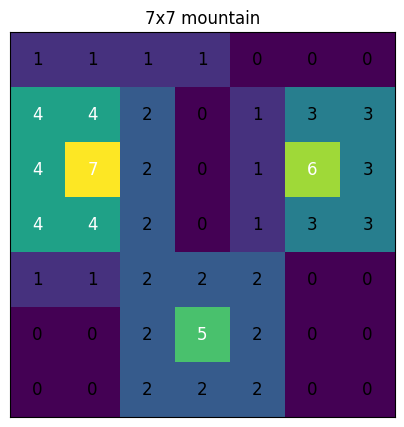

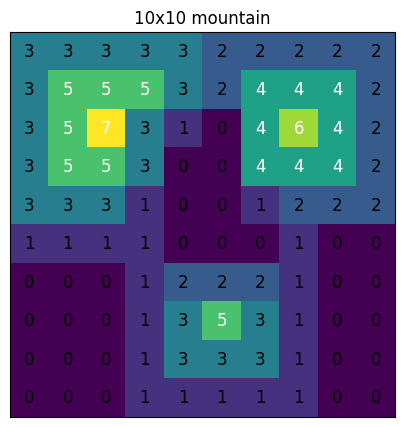

In [9]:
def draw_heatmap(H, title):
    H = np.array(H)

    print(title, "matrix:")
    print(H)
    print("\nFlat list (row-major):")
    print(", ".join(str(int(v)) for v in H.flatten()))
    print()

    plt.figure(figsize=(5, 5))
    plt.imshow(H, cmap="viridis", interpolation="nearest")

    plt.title(title)

    # Add grid lines
    plt.grid(which="both", color="white", linewidth=1)

    # Make each cell square
    plt.gca().set_aspect("equal", adjustable="box")

    # Turn off axis ticks/labels
    plt.xticks([])
    plt.yticks([])

    # Put height values in each cell
    rows, cols = H.shape
    max_val = H.max() if H.size > 0 else 0
    for i in range(rows):
        for j in range(cols):
            value = H[i, j]
            text_color = "white" if max_val and value > max_val / 2 else "black"
            plt.text(j, i, str(int(value)),
                     ha="center", va="center",
                     color=text_color, fontsize=12)

draw_heatmap(H7, "7x7 mountain")
draw_heatmap(H10, "10x10 mountain")
plt.show()

In [10]:
def print_avr_db(H, label="m7"):
    H = [[int(v) for v in row] for row in H]  # 确保都是普通 int
    print(f"{label}: .db ", end="")
    first = True
    for y, row in enumerate(H):
        if not first:
            print("    \\", end="")  # 行续接符号
        print(",".join(str(v) for v in row) + ",")
        first = False

print_avr_db(H7, label="m7")
print("\n") 
print_avr_db(H10,label="m10")

m7: .db 1,1,1,1,0,0,0,
    \4,4,2,0,1,3,3,
    \4,7,2,0,1,6,3,
    \4,4,2,0,1,3,3,
    \1,1,2,2,2,0,0,
    \0,0,2,5,2,0,0,
    \0,0,2,2,2,0,0,


m10: .db 3,3,3,3,3,2,2,2,2,2,
    \3,5,5,5,3,2,4,4,4,2,
    \3,5,7,3,1,0,4,6,4,2,
    \3,5,5,3,0,0,4,4,4,2,
    \3,3,3,1,0,0,1,2,2,2,
    \1,1,1,1,0,0,0,1,0,0,
    \0,0,0,1,2,2,2,1,0,0,
    \0,0,0,1,3,5,3,1,0,0,
    \0,0,0,1,3,3,3,1,0,0,
    \0,0,0,1,1,1,1,1,0,0,
